In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler

In [15]:
train_data = pd.read_csv(r'D:\kaggle-projects\titanic\data\train.csv')

In [16]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
feature_cols = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']
categorical_cols =['Pclass','Sex','Cabin','SibSp','Parch']
unlabeled_cat_cols = ['Sex','Cabin']
descrete_cols = ['Age']
continuous_cols =['Fare']

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
Y_train = train_data['Survived']

In [23]:
#To check unexpected missing values
for col in feature_cols:
    print(f'Analysing {col} :')
    print(train_data[col].unique())
    print('==================================')

Analysing Pclass :
[3 1 2]
Analysing Sex :
['male' 'female']
Analysing Age :
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Analysing SibSp :
[1 0 3 4 2 5 8]
Analysing Parch :
[0 1 2 5 3 4 6]
Analysing Fare :
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475 

In [24]:
for col in categorical_cols:
    print(f'Analysing {col} :')
    print(train_data[col].value_counts())
    print('==================================')

Analysing Pclass :
3    491
1    216
2    184
Name: Pclass, dtype: int64
Analysing Sex :
male      577
female    314
Name: Sex, dtype: int64
Analysing Cabin :
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Analysing SibSp :
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Analysing Parch :
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:ylabel='Frequency'>

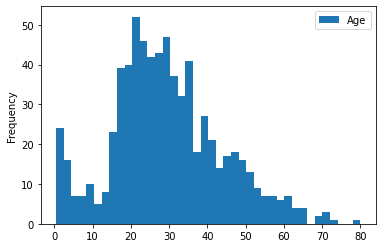

In [25]:
#Analysing Age
train_data.plot(y='Age',kind='hist',bins=40)

In [26]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
#Dropping Cabin as it has lot of null values
feature_cols = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
categorical_cols =['Pclass','Sex','Embarked']
unlabeled_cat_cols = ['Sex', 'Embarked']
descrete_cols = ['Age']
continuous_cols =['Fare']

In [28]:
mean_age = round(train_data['Age'].mean(),2)
train_data['Age'].fillna(mean_age,inplace=True)

In [29]:
emb_mode = train_data['Embarked'].mode()
train_data['Embarked'].fillna(emb_mode[0],inplace=True)

In [30]:
categorical_columns_dict={}
for col in unlabeled_cat_cols:
    sorted_indices = train_data[col].value_counts().index
    categorical_columns_dict[col] = dict(zip(sorted_indices, range(len(sorted_indices),0,-1)))
    train_data[col] = train_data[col].map(categorical_columns_dict[col])

In [31]:
categorical_columns_dict

{'Sex': {'male': 2, 'female': 1}, 'Embarked': {'S': 3, 'C': 2, 'Q': 1}}

In [32]:
train_data = train_data[feature_cols]

In [33]:
scaler = MinMaxScaler()
scaler.fit(train_data[feature_cols])
X_train_data = scaler.transform(train_data[feature_cols])

In [34]:
X_train = pd.DataFrame(X_train_data, columns = feature_cols)

In [35]:
for col in categorical_columns_dict.keys():
    for i, key in enumerate(list(categorical_columns_dict[col].keys())):
        categorical_columns_dict[col][key] = X_train[col].value_counts().index[i]

In [36]:
categorical_columns_dict

{'Sex': {'male': 1.0, 'female': 0.0},
 'Embarked': {'S': 1.0, 'C': 0.5, 'Q': 0.0}}

In [37]:
p = open('categorical_scaled_map.pickle','wb')
pickle.dump(categorical_columns_dict,p)
p.close()

In [38]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.5
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
888,1.0,0.0,0.367932,0.125,0.333333,0.045771,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.5


In [39]:
preprocessed_data = X_train
preprocessed_data['y'] = Y_train

In [40]:
preprocessed_data.to_csv('../data/preprocessed.csv',index=False)